In [149]:
#libraries
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_smooth, geom_line, geom_abline
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC


## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [115]:
#data
data = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [116]:
ct = ColumnTransformer(
  [
    ("dummify", 
    #handle_unknown: ignore observations for unknown values in category variable
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    #("standardize", 
    #StandardScaler(), 
    #make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_logistic = Pipeline(
  [("preprocessing", ct),
  ("logistic_regression", LogisticRegression())]
).set_output(transform="pandas")

In [117]:
#variable selection
X = data[['age', 'chol']]
y = data['diagnosis']

In [118]:
#fit pipeline
lr_pipeline_logistic.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x17eadf3b0>)])),
                ('logistic_regression', LogisticRegression())])

In [119]:
model = lr_pipeline_logistic.named_steps['logistic_regression']
# coefficients for 'age' and 'chol'
age_1 = model.coef_[0][0]
chol_1 = model.coef_[0][1]
#intercept
intercept_1 = model.intercept_[0]

print("coef: ", coef, "intercept: ", intercept)

coef:  [0.04686331 0.00180124] intercept:  -4.6857038181153055
coef:  [0.04686331 0.00180124] intercept:  -4.6857038181153055


In [120]:
#For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
#-3.24 + .046*Age + .0018*Chol = log-odds for .9

#log-odds = log(p / 1-p)
log_odds_90 = np.log(.9 / (1-.9) )
log_odds_50 = np.log(.5 / (1-.5) )

chol_90 = (log_odds_90 - (intercept_1 + age_1*55)) / chol_1

chol_50 = (log_odds_50 - (intercept_1 + age_1*55)) / chol_1

print("for 90%: ", chol_90, "for 50%: ", chol_50)

for 90%:  1587.7158792750618 for 50%:  367.87488979868016
for 90%:  1587.7158792750618 for 50%:  367.87488979868016


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [121]:
lr_pipeline_linear_disc = Pipeline(
  [("preprocessing", ct),
  ("linear_disc_regression", LinearDiscriminantAnalysis())]
).set_output(transform="pandas")

In [122]:
#fit pipeline
lr_pipeline_linear_disc.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x17eadf3b0>)])),
                ('linear_disc_regression', LinearDiscriminantAnalysis())])

In [123]:
model = lr_pipeline_linear_disc.named_steps['linear_disc_regression']
# coefficients for 'age' and 'chol'
age_2 = model.coef_[0][0]
chol_2 = model.coef_[0][1]
#intercept
intercept_2 = model.intercept_[0]

print("coef: ", coef, "intercept: ", intercept)

coef:  [0.04686331 0.00180124] intercept:  -4.6857038181153055
coef:  [0.04686331 0.00180124] intercept:  -4.6857038181153055


In [124]:
#log-odds = log(p / 1-p)
log_odds_90 = np.log(.9 / (1-.9) )
log_odds_50 = np.log(.5 / (1-.5) )

chol_90 = (log_odds_90 - (intercept_2 + age_2*55)) / chol_2

chol_50 = (log_odds_50 - (intercept_2 + age_2*55)) / chol_2

print("for 90%: ", chol_90, "for 50%: ", chol_50)

for 90%:  1595.963448699697 for 50%:  368.2353575299383
for 90%:  1595.963448699697 for 50%:  368.2353575299383


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [125]:
#use linear kernel, and tune c
lr_pipeline_linear_disc = Pipeline(
  [("preprocessing", ct),
  ("support_vector_class", SVC(C = 0.1, kernel = 'linear'))]
).set_output(transform="pandas")

In [126]:
#tune c
cs = {"support_vector_class__C": [.001, .01, .1, 1, 10, 100]}

gscv = GridSearchCV(lr_pipeline_linear_disc, cs, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

params_df = pd.DataFrame(gscv_fitted.cv_results_['params'])

results_df = params_df.assign(scores=gscv_fitted.cv_results_['mean_test_score'])

results_df.sort_values(by = 'scores', ascending = False)


,support_vector_class__C,scores
2,0.100,0.598293
3,1.000,0.598293
4,10.000,0.598293
5,100.000,0.598293
1,0.010,0.569024
0,0.001,0.559146


In [127]:
#fit pipeline
lr_pipeline_linear_disc.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x17eadf3b0>)])),
                ('support_vector_class', SVC(C=0.1, kernel='linear'))])

In [128]:
model = lr_pipeline_linear_disc.named_steps['support_vector_class']
# coefficients for 'age' and 'chol'
age_3 = model.coef_[0][0]
chol_3 = model.coef_[0][1]
#intercept
intercept_3 = model.intercept_[0]

print("coef: ", coef, "intercept: ", intercept)

coef:  [0.04686331 0.00180124] intercept:  -4.6857038181153055
coef:  [0.04686331 0.00180124] intercept:  -4.6857038181153055


In [129]:
#For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
#-3.24 + .046*Age + .0018*Chol = log-odds for .9

#log-odds = log(p / 1-p)
log_odds_90 = np.log(.9 / (1-.9) )
log_odds_50 = np.log(.5 / (1-.5) )

chol_90 = (log_odds_90 - (intercept_3 + age_3*55)) / chol_3

chol_50 = (log_odds_50 - (intercept_3 + age_3*55)) / chol_3

print("for 90%: ", chol_90, "for 50%: ", chol_50)

for 90%:  913.468136877373 for 50%:  312.70883227583215
for 90%:  913.468136877373 for 50%:  312.70883227583215


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

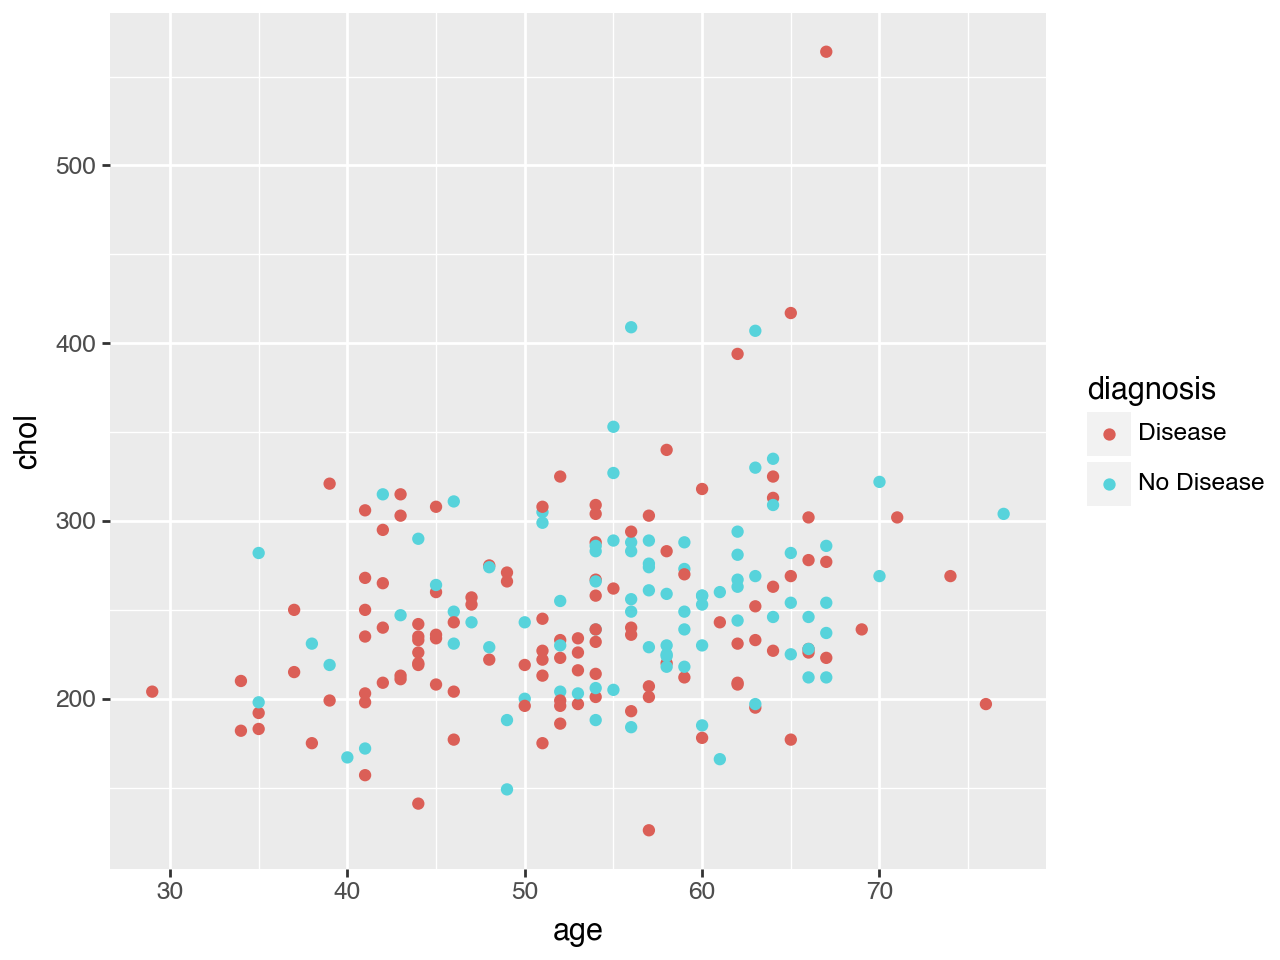

In [157]:
data['line'] = age_1 * data['age'] + chol_1 * data['chol']



(ggplot(data, aes(x = "age", y = "chol", color = 'diagnosis'))
+ geom_point()
+ geom_abline(data, aes(intercept = intercept_1, slope = ))
)